<a href="https://colab.research.google.com/github/shiva-tech-code/Autonomous-Robot-in-HealthCare/blob/main/FinalProject(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3D Hospital Grid Environment


Episode 1 - Total Reward: 0


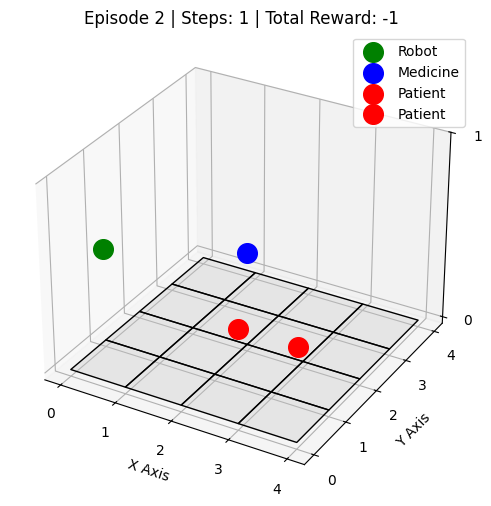

<Figure size 640x480 with 0 Axes>

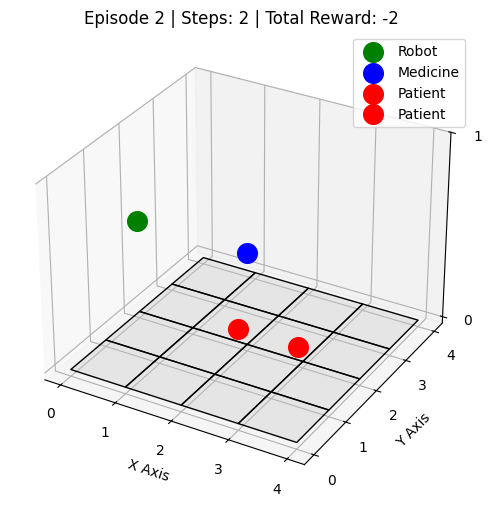

<Figure size 640x480 with 0 Axes>

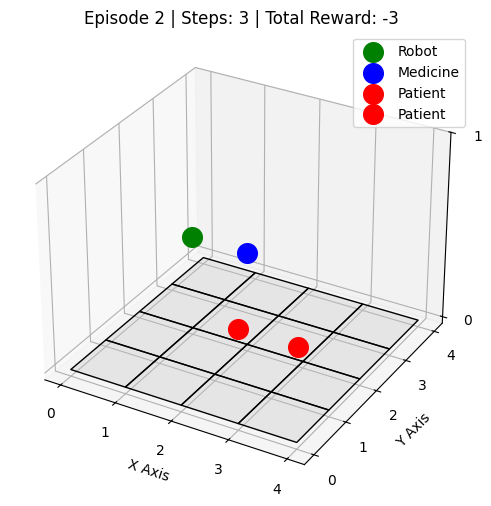

<Figure size 640x480 with 0 Axes>

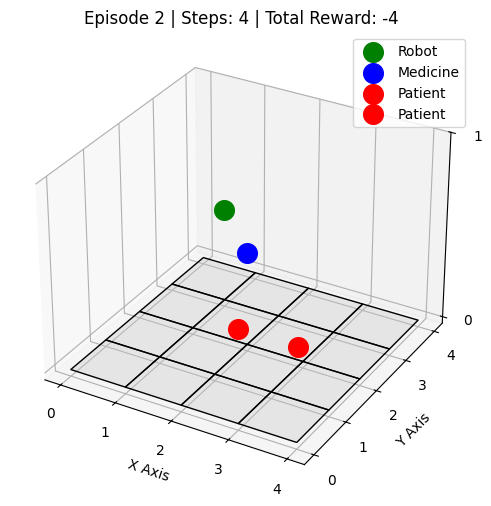

<Figure size 640x480 with 0 Axes>

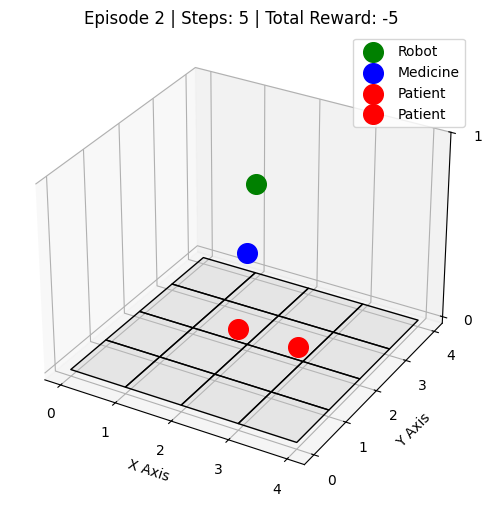

Episode 2 - Total Reward: -5


<Figure size 640x480 with 0 Axes>

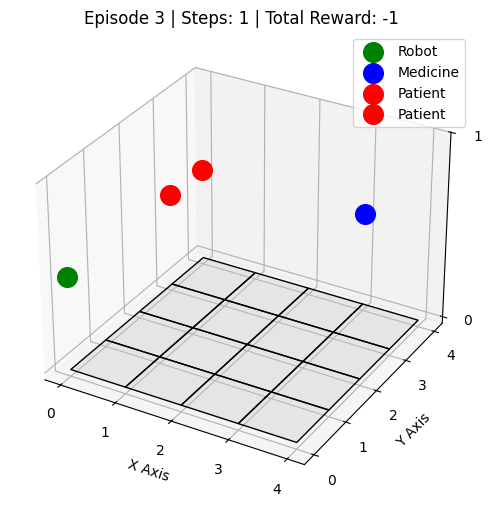

<Figure size 640x480 with 0 Axes>

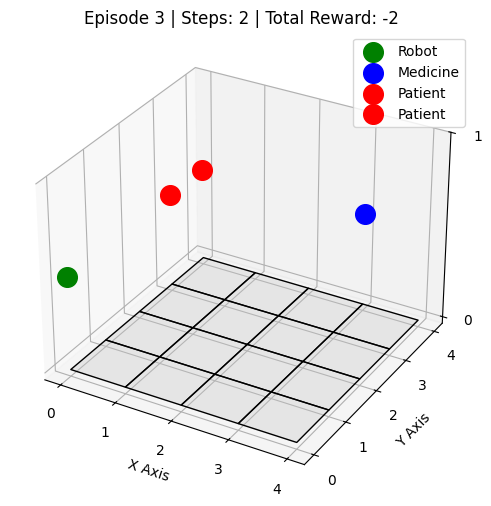

<Figure size 640x480 with 0 Axes>

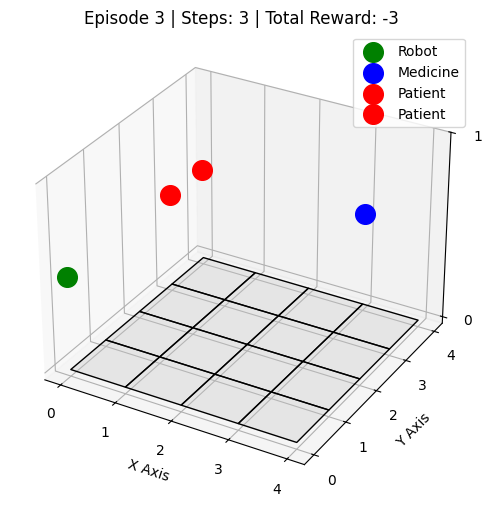

<Figure size 640x480 with 0 Axes>

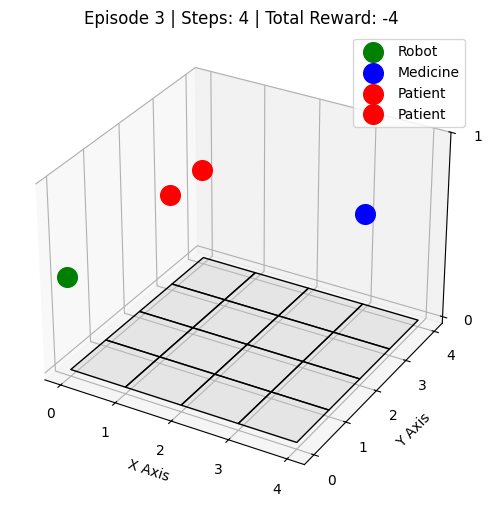

<Figure size 640x480 with 0 Axes>

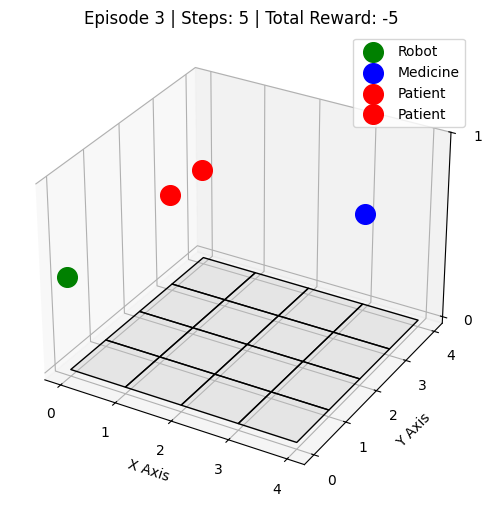

Episode 3 - Total Reward: -5


<Figure size 640x480 with 0 Axes>

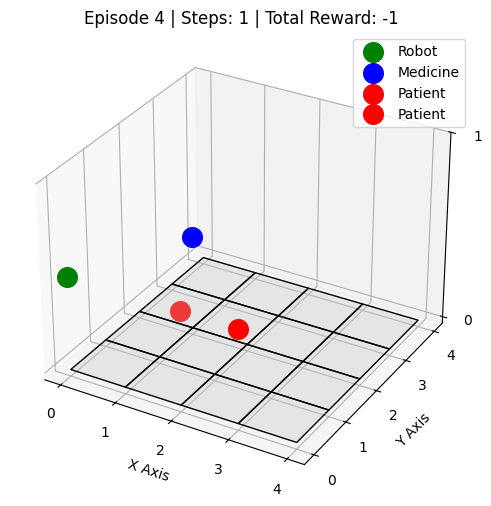

<Figure size 640x480 with 0 Axes>

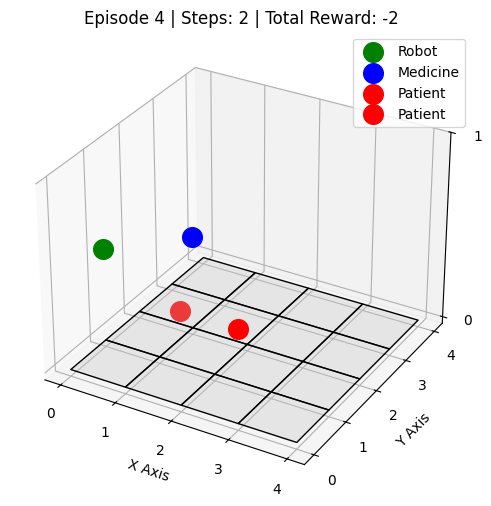

<Figure size 640x480 with 0 Axes>

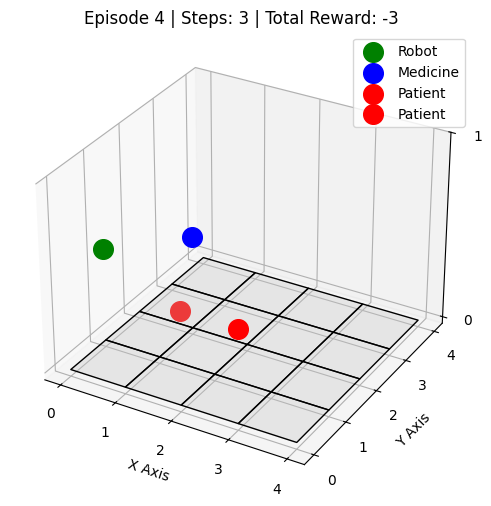

<Figure size 640x480 with 0 Axes>

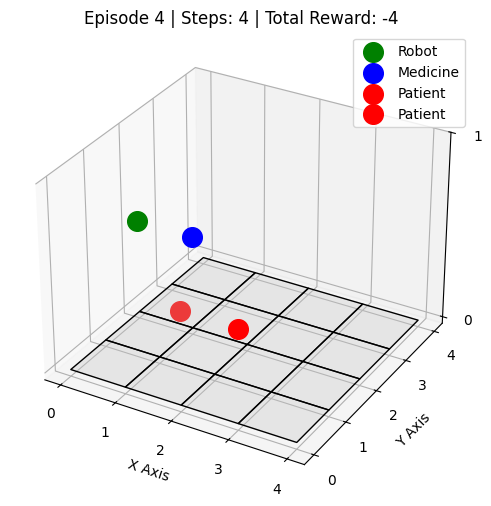

<Figure size 640x480 with 0 Axes>

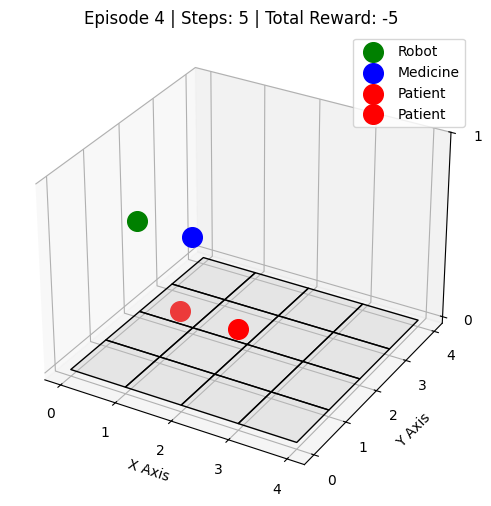

Episode 4 - Total Reward: -5


<Figure size 640x480 with 0 Axes>

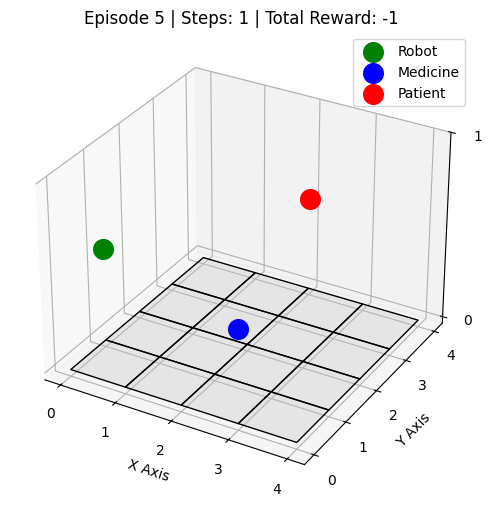

<Figure size 640x480 with 0 Axes>

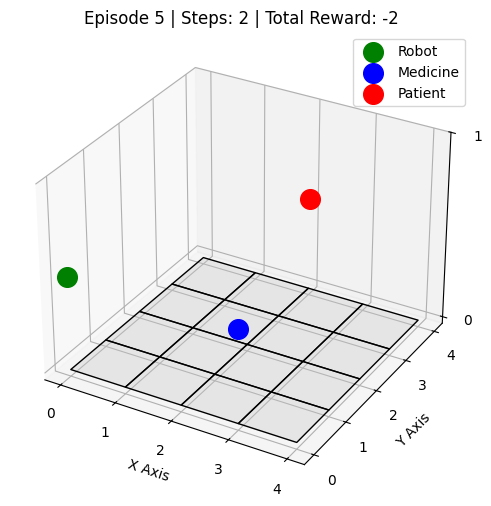

<Figure size 640x480 with 0 Axes>

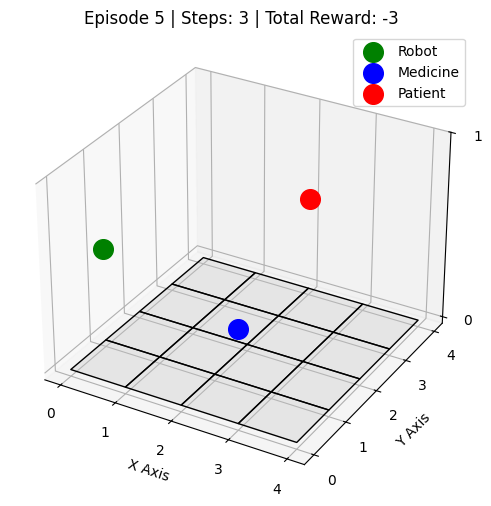

<Figure size 640x480 with 0 Axes>

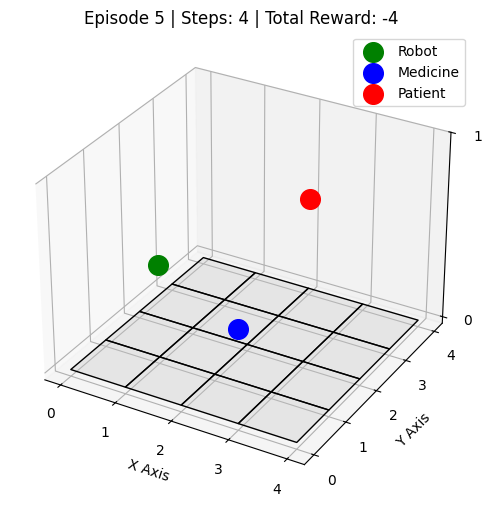

<Figure size 640x480 with 0 Axes>

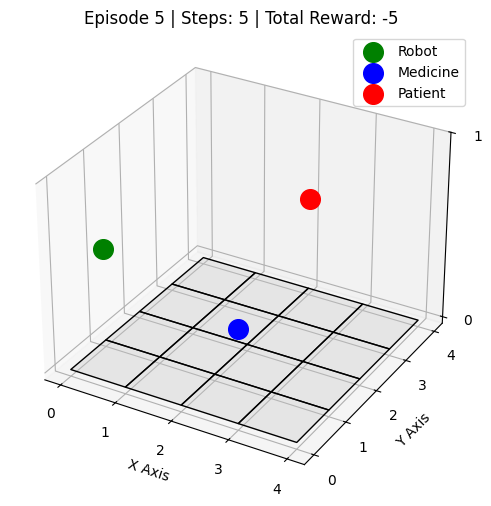

Episode 5 - Total Reward: -5


<Figure size 640x480 with 0 Axes>

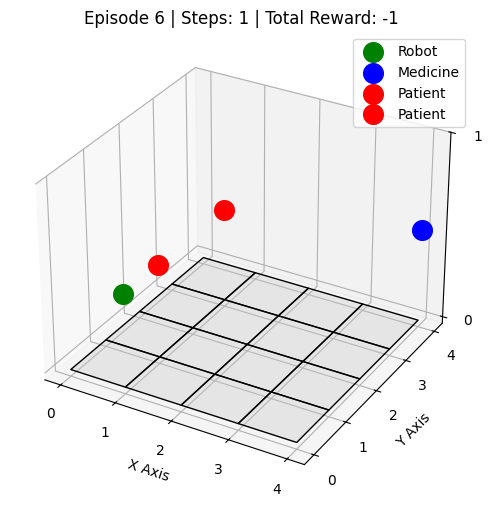

<Figure size 640x480 with 0 Axes>

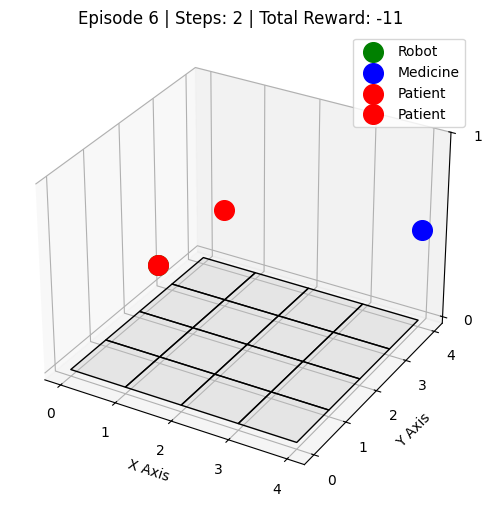

<Figure size 640x480 with 0 Axes>

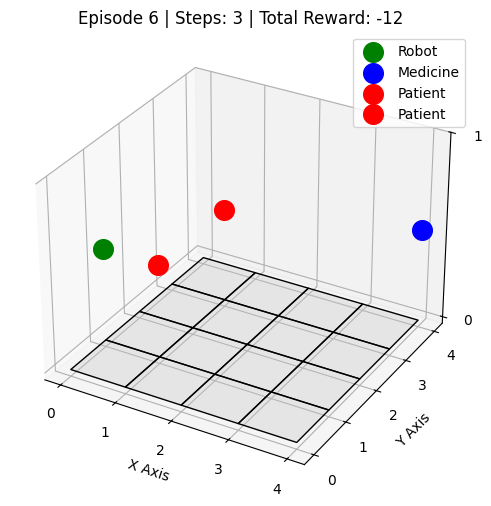

<Figure size 640x480 with 0 Axes>

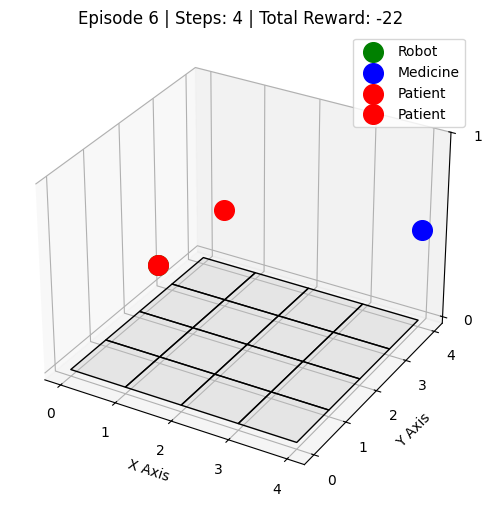

<Figure size 640x480 with 0 Axes>

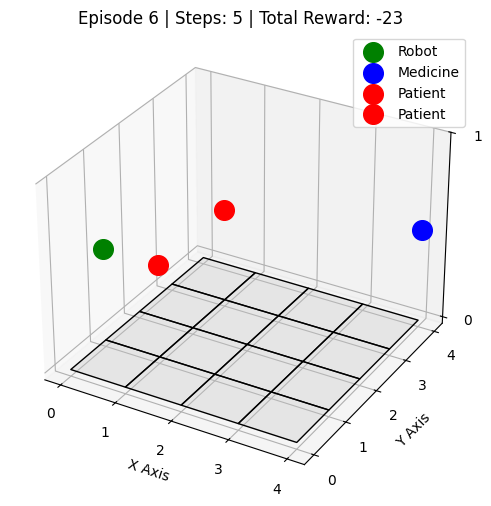

<Figure size 640x480 with 0 Axes>

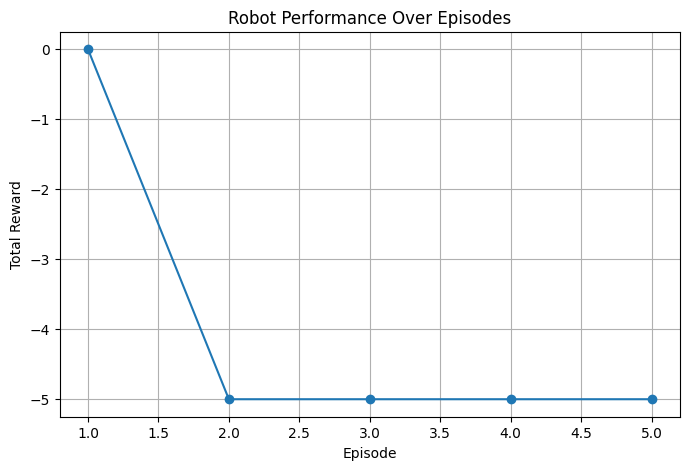

In [ ]:
import numpy as np
import random
import torch
import gym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the 3D Hospital Grid Environment
class HospitalEnv3D(gym.Env):
    def __init__(self, grid_size=5):
        self.grid_size = grid_size
        self.state = (0, 0)  # Robot starts at (0,0)
        self.patients = [(random.randint(0, grid_size - 1), random.randint(0, grid_size - 1)) for _ in range(2)]
        self.medicine_location = (random.randint(0, grid_size - 1), random.randint(0, grid_size - 1))
        self.has_medicine = False
        self.battery = 5  # Limit moves per episode to 5
        self.action_space = gym.spaces.Discrete(4)
        self.observation_space = gym.spaces.Box(low=0, high=grid_size, shape=(2,), dtype=np.int32)
        self.patients_remaining = set(self.patients)
        self.episode = 1
        self.total_reward = 0
        self.steps = 0

    def step(self, action):
        x, y = self.state
        if action == 0:  # Up
            y = max(0, y - 1)
        elif action == 1:  # Down
            y = min(self.grid_size - 1, y + 1)
        elif action == 2:  # Left
            x = max(0, x - 1)
        elif action == 3:  # Right
            x = min(self.grid_size - 1, x + 1)

        self.state = (x, y)
        self.battery -= 1  # Reduce battery per move
        reward = -1
        done = False

        if self.state == self.medicine_location:
            self.has_medicine = True
            reward = 10

        if self.state in self.patients_remaining:
            if self.has_medicine:
                reward = 20
                self.patients_remaining.remove(self.state)
                self.has_medicine = False
                if not self.patients_remaining:
                    done = True  # Task complete
            else:
                reward = -10  # Reached patient without medicine

        if self.battery <= 0:
            done = True  # End if battery runs out

        self.total_reward += reward
        self.steps += 1
        self.render()  # Update 3D visualization

        return np.array(self.state), reward, done, {}

    def reset(self):
        print(f"Episode {self.episode} - Total Reward: {self.total_reward}")
        self.state = (0, 0)
        self.has_medicine = False
        self.battery = 5  # Reset battery to 5 moves per episode
        self.patients = [(random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1)) for _ in range(2)]
        self.medicine_location = (random.randint(0, self.grid_size - 1), random.randint(0, self.grid_size - 1))
        self.patients_remaining = set(self.patients)

        reward = self.total_reward  # Save last episode's reward
        self.total_reward = 0
        self.steps = 0
        self.episode += 1
        return np.array(self.state), reward

    def render(self):
        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111, projection='3d')

        # Create grid surface
        X, Y = np.meshgrid(range(self.grid_size), range(self.grid_size))
        Z = np.zeros_like(X)

        ax.plot_surface(X, Y, Z, color='white', edgecolor='black', alpha=0.3)

        # Plot robot (Green)
        rx, ry = self.state
        ax.scatter(rx, ry, 0.5, color='green', s=200, label='Robot')

        # Plot medicine (Blue)
        mx, my = self.medicine_location
        ax.scatter(mx, my, 0.5, color='blue', s=200, label='Medicine')

        # Plot patients (Red)
        for px, py in self.patients_remaining:
            ax.scatter(px, py, 0.5, color='red', s=200, label='Patient')

        ax.set_xlabel("X Axis")
        ax.set_ylabel("Y Axis")
        ax.set_zlabel("Z Axis")
        ax.set_xticks(range(self.grid_size))
        ax.set_yticks(range(self.grid_size))
        ax.set_zticks([0, 1])
        ax.set_title(f"Episode {self.episode} | Steps: {self.steps} | Total Reward: {self.total_reward}")

        plt.legend()
        plt.pause(0.3)
        plt.clf()

# Run 3D Visualization & Performance Graph
env = HospitalEnv3D()
num_episodes = 5  # Run for 5 episodes

rewards_per_episode = []  # Track rewards

for episode in range(num_episodes):
    state, episode_reward = env.reset()
    done = False
    steps = 0
    while not done and steps < 5:  # Limit each episode to 5 steps
        action = env.action_space.sample()  # Random moves
        state, reward, done, _ = env.step(action)
        steps += 1

    rewards_per_episode.append(episode_reward)  # Save reward

plt.figure(figsize=(8, 5))
plt.plot(range(1, num_episodes + 1), rewards_per_episode, marker='o', linestyle='-')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Robot Performance Over Episodes")
plt.grid()
plt.show()


Emergency Scenario Handler

In [ ]:
import random

class EmergencyRobot:
    def __init__(self):
        self.state = "Idle"
        self.reward = 0

    def detect_emergency(self, situation):
        """Simulate detection of different emergency situations."""
        emergencies = {
            "fire": self.handle_fire,
            "patient_arrival_night": self.handle_patient_arrival,
            "labor_pain_night": self.handle_labor_pain,
            "acid_attack_patient": self.handle_acid_attack,
            "accident_patient": self.handle_accident,
            "suicide_case": self.handle_suicide_case,
            "heart_attack": self.handle_heart_attack,
        }

        if situation in emergencies:
            emergencies[situation]()
        else:
            print("Unknown situation detected!")
            self.reward -= 5

    def handle_fire(self):
        print(" Fire detected! Activating fire suppression system, guiding people to exits, and notifying emergency responders.")
        self.state = "Handling Fire"
        self.reward += 10  # Reward for quick response

    def handle_patient_arrival(self):
        print(" Patient arrived at 3 AM! Guiding patient to emergency ward, checking vital signs, and notifying doctors.")
        self.state = "Handling Patient Arrival"
        self.reward += 8  # Reward for responding to a medical emergency

    def handle_labor_pain(self):
        print(" Pregnant woman in labor! Assisting patient to maternity ward, monitoring contractions, preparing delivery room, and calling gynecologist.")
        self.state = "Handling Labor Pain"
        self.reward += 10  # Reward for prioritizing childbirth case

    def handle_acid_attack(self):
        print(" Acid attack victim detected! Providing immediate water wash, administering pain relief, calling burn specialists, and alerting dermatologists.")
        self.state = "Handling Acid Attack"
        self.reward += 10  # High priority medical emergency

    def handle_accident(self):
        print(" Road accident patient arrived at hospital! Transporting patient to trauma center, stopping bleeding, preparing for surgery, and alerting orthopedic surgeons.")
        self.state = "Handling Accident Case"
        self.reward += 10  # Reward for trauma response

    def handle_suicide_case(self):
        print(" Suicide attempt patient detected! Stabilizing patient, administering first aid, contacting psychiatric specialists, and notifying crisis counselors.")
        self.state = "Handling Suicide Case"
        self.reward += 9  # Reward for mental health emergency response

    def handle_heart_attack(self):
        print(" Heart attack patient! Administering CPR, providing oxygen, preparing ICU for emergency treatment, and calling cardiologists.")
        self.state = "Handling Heart Attack"
        self.reward += 10  # Life-threatening emergency response

    def get_status(self):
        return f"Current State: {self.state}, Reward: {self.reward}"

# Example Simulation
robot = EmergencyRobot()
scenarios = ["fire", "patient_arrival_night", "labor_pain_night", "acid_attack_patient", "accident_patient", "suicide_case", "heart_attack", "unknown_situation"]

for scenario in scenarios:
    print(f"\n[Scenario: {scenario}]")
    robot.detect_emergency(scenario)
    print(robot.get_status())



[Scenario: fire]
 Fire detected! Activating fire suppression system, guiding people to exits, and notifying emergency responders.
Current State: Handling Fire, Reward: 10

[Scenario: patient_arrival_night]
 Patient arrived at 3 AM! Guiding patient to emergency ward, checking vital signs, and notifying doctors.
Current State: Handling Patient Arrival, Reward: 18

[Scenario: labor_pain_night]
 Pregnant woman in labor! Assisting patient to maternity ward, monitoring contractions, preparing delivery room, and calling gynecologist.
Current State: Handling Labor Pain, Reward: 28

[Scenario: acid_attack_patient]
 Acid attack victim detected! Providing immediate water wash, administering pain relief, calling burn specialists, and alerting dermatologists.
Current State: Handling Acid Attack, Reward: 38

[Scenario: accident_patient]
 Road accident patient arrived at hospital! Transporting patient to trauma center, stopping bleeding, preparing for surgery, and alerting orthopedic surgeons.
Curre